### 과제: 언어분류모델
- 알파벳의 빈도 수에 따라 분류 할 수 있음 <--- 이는 언어학 기반임
- 알파벳을 소문자든 대문자든 통일 시키기
- columns: a ~ z or A ~ Z
- label class: en, fr, id, tl
- learning merthod: supervised learning, multi classification
- learning algorithm: kinds of classification algorithm

In [99]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_path = '../data/Language/train/'
test_path = '../data/language/test/'

# 임의의 파일?
train_csv = '../data/Language/lang_train.csv'
test_csv = '../data/Language/lang_test.csv'

In [10]:
# 파일 읽기 => open() -> read(), readline(), readlines() -> close()
#           => with open() as 구문

# 파일 존재 여부 파악
if not os.path.exists(train_csv):
    print(f"{train_csv} not exists")
else:
    with open(train_csv, mode='r') as f:
        all_data = f.read()
        print(f"[file data]: {all_data}")

[file data]: 


In [25]:
from collections import Counter
Counter('ahdjshajask')

Counter({'a': 3, 'h': 2, 'd': 1, 'j': 2, 's': 2, 'k': 1})

In [84]:
# 파일 안에 파일 및 폴더를 가져오기
def make_df(path):
    files = os.listdir(path)
    label_list = []
    colname = [chr(x) for x in range(ord('a'), ord('z')+1)]
    # print(len(colname))
    data_df = pd.DataFrame(columns=colname)
    for file in files:
        # print(file, train_path+file, os.path.exists(train_path+file))
        label = file[:2]
        label_list.append(label)
        # print(label_list)
        with open(path+file, mode='r') as f:
            # print(f"[file data] {f.read()}")
            all_data = f.read()
            # 대소문자 통일
            all_data = all_data.lower()
            all_data = all_data.replace('\n', '')
            # print(f"len data: {len(all_data)}")
            
            # 알파벳 아닌 것들 제거
            for char in all_data:
                if not (ord('a') <= ord(char) <= ord('z')):
                    all_data = all_data.replace(char, '')
            # print(f"all data:\n{all_data}")
            # print(f"len data: {len(all_data)}")
            
            # a ~ z count
            count_data = {key:0 for key in colname}
            # print(len(count_data))
            for ch in all_data:
                if ch in count_data:
                    count_data[ch] = count_data[ch] + 1
                else:
                    count_data[ch] = 1
            # count_data = Counter(all_data)
            # frequency
            for data in count_data:
                if count_data[data] == 0:
                    count_data[data] = 0
                else:
                    count_data[data] = count_data[data] / len(all_data)
            count_data = dict(sorted(count_data.items()))
            # print(count_data)
            count_data_df = pd.DataFrame(count_data.values(), index=count_data.keys()).T
            # print(count_data_df.T)
        data_df = pd.concat([data_df, count_data_df], ignore_index=True)
        
    data_df['language'] = label_list
    # print(label_list)\
    return data_df


In [82]:
train_df = make_df(train_path)
train_df.to_csv(train_csv, index=False, encoding='utf-8')
train_df

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,language
0,0.075952,0.012840,0.045702,0.046137,0.105332,0.015669,0.019151,0.043743,0.073993,0.001741,...,0.077693,0.061371,0.080522,0.025898,0.009793,0.014146,0.000653,0.020022,0.000435,en
1,0.084178,0.019912,0.030404,0.038870,0.136998,0.017408,0.031239,0.027423,0.075355,0.002623,...,0.090140,0.071659,0.077739,0.030643,0.013712,0.013950,0.002027,0.010731,0.000596,en
2,0.071646,0.012172,0.045643,0.032642,0.120055,0.014661,0.025173,0.023513,0.094606,0.002490,...,0.053942,0.087967,0.081051,0.029046,0.018811,0.011895,0.000553,0.017981,0.000553,en
3,0.072210,0.027715,0.029977,0.039593,0.121041,0.016780,0.023567,0.059012,0.065234,0.001508,...,0.059201,0.073341,0.093703,0.024321,0.005090,0.019608,0.006033,0.017534,0.001697,en
4,0.073806,0.020368,0.031099,0.039641,0.141261,0.020368,0.020368,0.056943,0.065046,0.003285,...,0.072492,0.059571,0.095488,0.024967,0.010731,0.023872,0.003066,0.014893,0.000657,en
5,0.078738,0.010451,0.037253,0.053283,0.150487,0.016222,0.010708,0.015517,0.069377,0.002308,...,0.075083,0.071621,0.077584,0.053475,0.014299,0.000705,0.003911,0.003655,0.000834,fr
6,0.077913,0.014919,0.035749,0.044830,0.149735,0.011784,0.011496,0.012613,0.072003,0.002126,...,0.074741,0.082093,0.070561,0.054452,0.010631,0.004541,0.003892,0.005334,0.000468,fr
7,0.072717,0.013065,0.035412,0.044990,0.150754,0.010523,0.010582,0.011528,0.071416,0.003015,...,0.076914,0.078333,0.065681,0.050902,0.012711,0.002601,0.004966,0.004848,0.000118,fr
8,0.072599,0.015761,0.039836,0.051129,0.157111,0.013031,0.013527,0.014396,0.085629,0.004344,...,0.082030,0.066518,0.061057,0.042690,0.015140,0.000745,0.005088,0.004964,0.001986,fr
9,0.078947,0.011501,0.035283,0.051852,0.143275,0.012086,0.020078,0.019493,0.089864,0.003899,...,0.077778,0.072320,0.063353,0.043860,0.014035,0.000390,0.003314,0.005263,0.001170,fr


In [85]:
test_df = make_df(test_path)
test_df.to_csv(test_csv, index=False, encoding='utf-8')
test_df

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,language
0,0.067823,0.013459,0.034328,0.048817,0.116114,0.020014,0.016002,0.022798,0.076920,0.002411,...,0.070124,0.079550,0.075122,0.025910,0.014775,0.036103,0.005634,0.013087,0.000416,en
1,0.080283,0.016174,0.035350,0.038342,0.129865,0.016704,0.018950,0.042697,0.073986,0.004463,...,0.066227,0.063599,0.078880,0.027631,0.013026,0.014880,0.002119,0.013300,0.001491,en
2,0.056764,0.012008,0.035835,0.049876,0.127155,0.013476,0.008620,0.007303,0.086050,0.002786,...,0.067304,0.090078,0.068433,0.042912,0.013852,0.028909,0.009298,0.005157,0.000414,fr
3,0.071875,0.011413,0.038476,0.040330,0.139357,0.012185,0.015386,0.018410,0.079491,0.004150,...,0.064060,0.073023,0.066334,0.048652,0.013598,0.002892,0.004282,0.003355,0.001192,fr
4,0.104322,0.022424,0.015275,0.044199,0.089373,0.011375,0.026649,0.015600,0.090510,0.005362,...,0.069548,0.079298,0.052811,0.036887,0.016575,0.033637,0.004875,0.009587,0.000487,id
5,0.164736,0.026052,0.014586,0.041574,0.088257,0.006201,0.035997,0.025116,0.082056,0.007254,...,0.053625,0.048789,0.053235,0.047424,0.004680,0.004602,0.000468,0.014820,0.000585,id
6,0.185554,0.019668,0.014370,0.026720,0.033086,0.007966,0.082523,0.014065,0.081723,0.000229,...,0.035830,0.058700,0.052258,0.023899,0.004803,0.028359,0.003392,0.017076,0.000419,tl
7,0.167676,0.016949,0.018765,0.024818,0.055690,0.009080,0.066586,0.011501,0.070218,0.000605,...,0.044189,0.052663,0.061743,0.037530,0.001816,0.016344,0.000605,0.018160,0.000605,tl


In [86]:
X_train = train_df.drop(columns=['language'])
X_test = test_df.drop(columns=['language'])
y_train = train_df['language']
y_test = test_df['language']

In [87]:
# 간단하게 DTC
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
# model params
print(f"max_feature_: {dtc_model.max_features_}")
print(f"max_depth: {dtc_model.max_depth}")
print(f"min_samples_split: {dtc_model.min_samples_split}")
print(f"dtc_model depth: {dtc_model.get_depth()}")

max_feature_: 26
max_depth: None
min_samples_split: 2
dtc_model depth: 2


In [89]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [90]:
dtc_pred = dtc_model.predict(X_test)

In [91]:
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_mat = confusion_matrix(y_test, dtc_pred)
dtc_repot = classification_report(y_test, dtc_pred, zero_division=0.0)

dtc_train_score = dtc_model.score(X_train, y_train)
dtc_test_score = dtc_model.score(X_test, y_test)

In [92]:
print(f"Decision Tree Accuracy: {dtc_acc*100:.2f} %")
print(f"Decision Tree Train Score: {dtc_train_score*100:.2f} %")
print(f"Decision Tree Test Score: {dtc_test_score*100:.2f} %\n")
print(f"Decision Tree Confusion Matrix\n{dtc_mat}\n")
print(f"Decision Tree Report\n{dtc_repot}")

Decision Tree Accuracy: 87.50 %
Decision Tree Train Score: 100.00 %
Decision Tree Test Score: 87.50 %

Decision Tree Confusion Matrix
[[2 0 0 0]
 [0 2 0 0]
 [1 0 1 0]
 [0 0 0 2]]

Decision Tree Report
              precision    recall  f1-score   support

          en       0.67      1.00      0.80         2
          fr       1.00      1.00      1.00         2
          id       1.00      0.50      0.67         2
          tl       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8



In [97]:
import graphviz
from sklearn.tree import export_graphviz

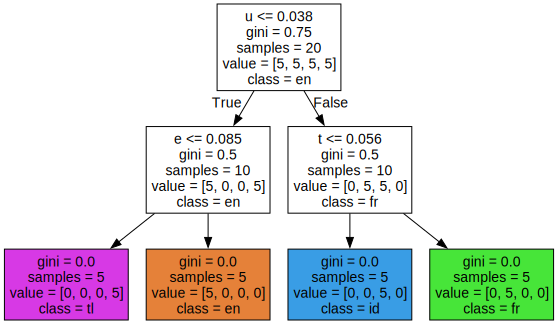

In [98]:
export_graphviz(dtc_model, out_file='../data/Language/default_tree.dot', class_names=['en', 'fr', 'id', 'tl'],
                feature_names=dtc_model.feature_names_in_, impurity=True, filled=True)

with open('../data/Language/default_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

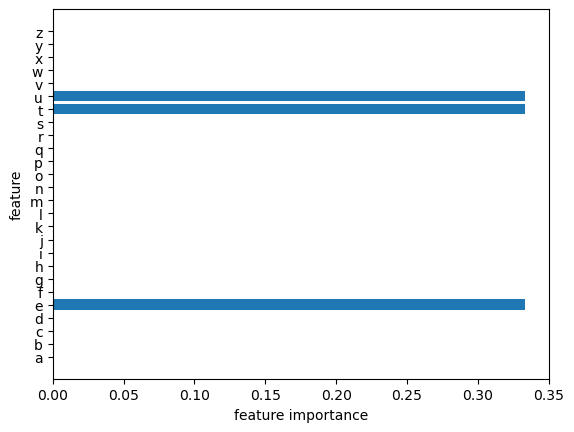

In [103]:
plt.barh(range(dtc_model.n_features_in_), dtc_model.feature_importances_, align='center')
plt.yticks(np.arange(dtc_model.n_features_in_), dtc_model.feature_names_in_)
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.show()

In [104]:
bf_X_train = train_df[['e', 't', 'u']]
bf_X_test = test_df[['e', 't', 'u']]

In [105]:
bf_dtc_model = DecisionTreeClassifier(max_depth=2)
bf_dtc_model.fit(bf_X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [110]:
bf_dtc_pred = bf_dtc_model.predict(bf_X_test)

bf_dtc_acc = accuracy_score(y_test, bf_dtc_pred)
bf_dtc_mat = confusion_matrix(y_test, bf_dtc_pred)
bf_dtc_repot = classification_report(y_test, bf_dtc_pred, zero_division=0.0)

bf_dtc_train_score = bf_dtc_model.score(bf_X_train, y_train)
bf_dtc_test_score = bf_dtc_model.score(bf_X_test, y_test)

In [111]:
print(f"Feature Selected Decision Tree Accuracy: {bf_dtc_acc*100:.2f} %")
print(f"Feature Selected Decision Tree Train Score: {bf_dtc_train_score*100:.2f} %")
print(f"Feature Selected Decision Tree Test Score: {bf_dtc_test_score*100:.2f} %\n")
print(f"Feature Selected Decision Tree Confusion Matrix\n{bf_dtc_mat}\n")
print(f"Feature Selected Decision Tree Report\n{bf_dtc_repot}")

Feature Selected Decision Tree Accuracy: 87.50 %
Feature Selected Decision Tree Train Score: 100.00 %
Feature Selected Decision Tree Test Score: 87.50 %

Feature Selected Decision Tree Confusion Matrix
[[2 0 0 0]
 [0 2 0 0]
 [1 0 1 0]
 [0 0 0 2]]

Feature Selected Decision Tree Report
              precision    recall  f1-score   support

          en       0.67      1.00      0.80         2
          fr       1.00      1.00      1.00         2
          id       1.00      0.50      0.67         2
          tl       1.00      1.00      1.00         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8



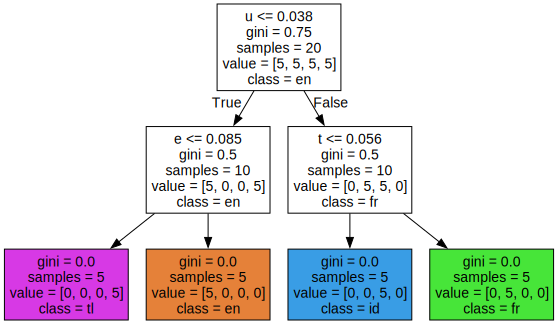

In [112]:
export_graphviz(bf_dtc_model, out_file='../data/Language/select_feature_tree.dot', class_names=['en', 'fr', 'id', 'tl'],
                feature_names=bf_dtc_model.feature_names_in_, impurity=True, filled=True)

with open('../data/Language/select_feature_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

- Decision Tree 라서 그런가.. over-fitting 어쩔거야...
- 다른 model을 써야하나....
- 어떤 모델? Logistic? 다중분류라서 귀찮은데...
- ensemble을 쓸까?
- voting은 귀찮으니까 randomforest 쓸까?

- 알파벳별 빈도수를 그려보자... 궁금

In [151]:
train_df.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'language'],
      dtype='object')

In [213]:
def draw_frequeny_bar(data_df, title):
    category = ['en', 'fr', 'id', 'tl']
    colname = data_df.columns[:-1]
    drop_cate = data_df.drop('language', axis=1)
    color_list = ['#FF9F9F', '#FF9FFA', '#A39FFF', '#9FEDFF']

    count_df = pd.DataFrame(columns=colname)
    for cate in category:
        idx = data_df[(data_df['language'] == cate)].index
        carry = drop_cate.loc[idx, :].sum(axis=0)
        # print(carry)
        count_df.loc[cate] = carry
    
    width = 0.2
    x = np.arange(len(colname))
    plt.figure(figsize=(20, 5))
    
    for i in range(len(category)):
        plt.bar(x + width*i, count_df.loc[category[i]], width, color=color_list[i], label=category[i])
    
    plt.title(title)
    plt.xlabel('alpha')
    plt.xticks(np.arange(len(colname)), colname)
    plt.ylabel('frequency')
    plt.legend(fontsize='large', ncol=4)
    plt.show()

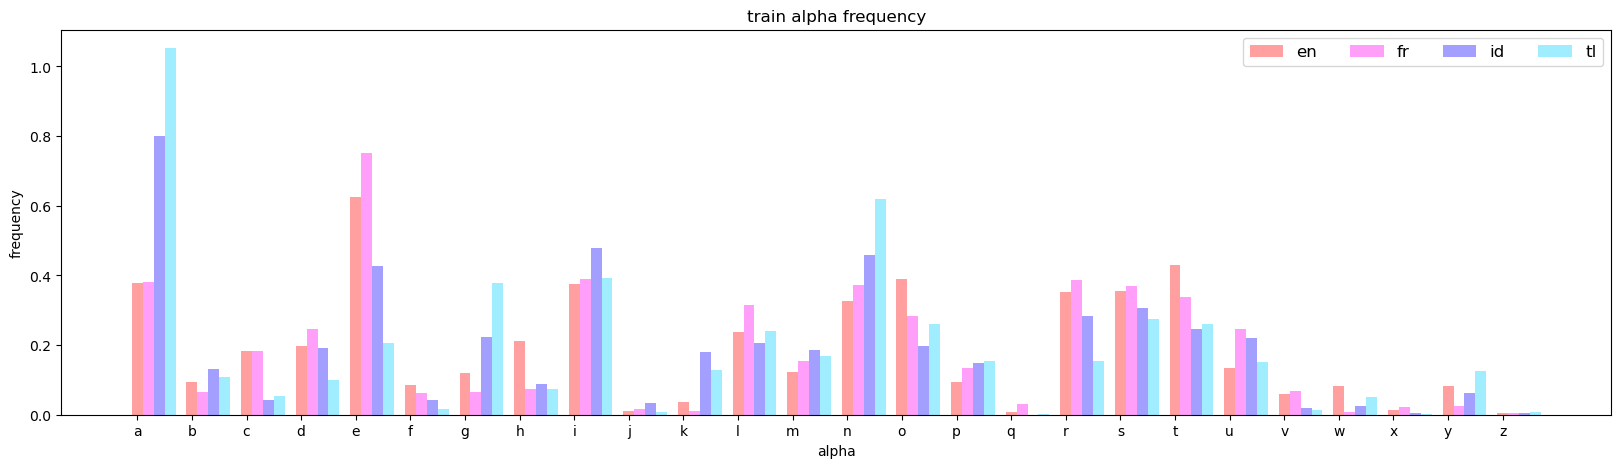

In [214]:
draw_frequeny_bar(train_df, 'train alpha frequency')

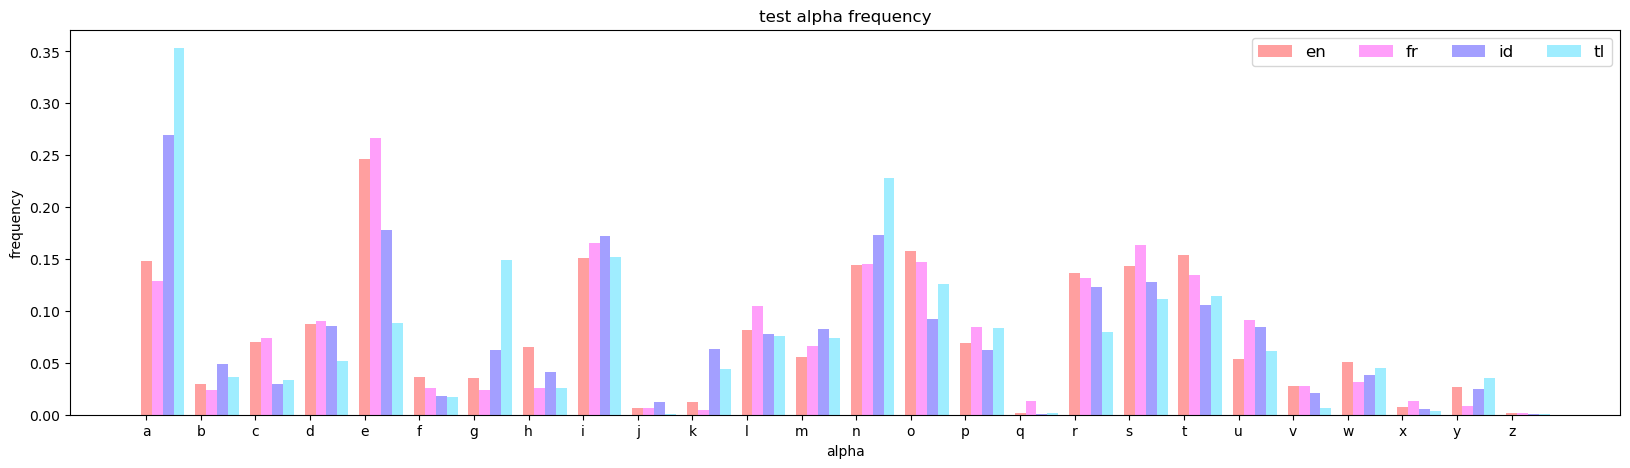

In [215]:
draw_frequeny_bar(test_df, 'test alpha frequency')